### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:
# Agregar una columna para identificar la tienda
tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2'
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'

# Concatenar todos los DataFrames en uno solo
tiendas = pd.concat([tienda, tienda2, tienda3, tienda4])

# Sumar los ingresos por tienda
ingresos_por_tienda = tiendas.groupby('Tienda')['Precio'].sum()

# Mostrar los ingresos por tienda
print(ingresos_por_tienda)

Tienda
Tienda 1    1.150880e+09
Tienda 2    1.116344e+09
Tienda 3    1.098020e+09
Tienda 4    1.038376e+09
Name: Precio, dtype: float64


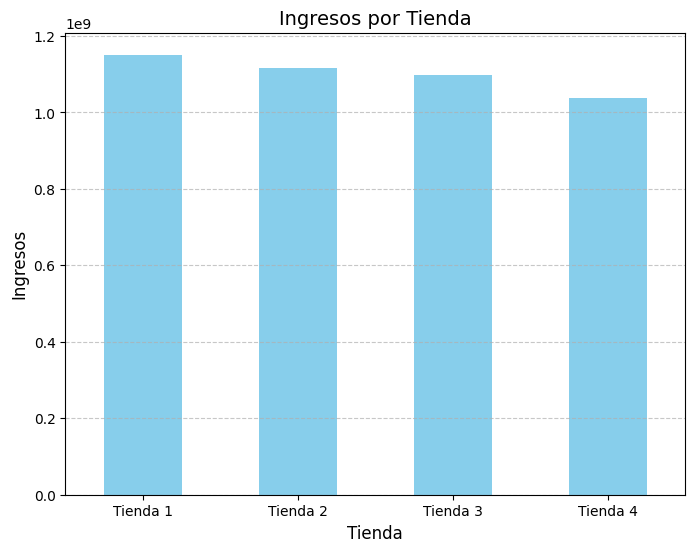

In [ ]:
import matplotlib.pyplot as plt
# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
ingresos_por_tienda.plot(kind='bar', color='skyblue')

# Personalizar el gráfico
plt.title('Ingresos por Tienda', fontsize=14)
plt.xlabel('Tienda', fontsize=12)
plt.ylabel('Ingresos', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

# 2. Ventas por categoría

In [ ]:
# Concatenar todos los datos en una sola lista de diccionarios
datos = pd.concat([tienda, tienda2, tienda3, tienda4])

# Contar ventas por tienda y categoría utilizando Python puro
ventas = {}
for _, row in datos.iterrows():
    tienda = row['Tienda']
    categoria = row['Categoría del Producto']

    if tienda not in ventas:
        ventas[tienda] = {}
    if categoria not in ventas[tienda]:
        ventas[tienda][categoria] = 0
    ventas[tienda][categoria] += 1

# Mostrar las ventas
for tienda, categorias in ventas.items():
    print(f"\nVentas en {tienda}:")
    for categoria, cantidad in categorias.items():
        print(f"  {categoria}: {cantidad}")


Ventas en Tienda 1:
  Electrónicos: 448
  Muebles: 465
  Juguetes: 324
  Electrodomésticos: 312
  Artículos para el hogar: 171
  Deportes y diversión: 284
  Libros: 173
  Instrumentos musicales: 182

Ventas en Tienda 2:
  Muebles: 442
  Instrumentos musicales: 224
  Deportes y diversión: 275
  Electrónicos: 422
  Artículos para el hogar: 181
  Juguetes: 313
  Electrodomésticos: 305
  Libros: 197

Ventas en Tienda 3:
  Electrodomésticos: 278
  Muebles: 499
  Instrumentos musicales: 177
  Deportes y diversión: 277
  Electrónicos: 451
  Juguetes: 315
  Artículos para el hogar: 177
  Libros: 185

Ventas en Tienda 4:
  Electrodomésticos: 254
  Muebles: 480
  Deportes y diversión: 277
  Libros: 187
  Electrónicos: 451
  Instrumentos musicales: 170
  Juguetes: 338
  Artículos para el hogar: 201


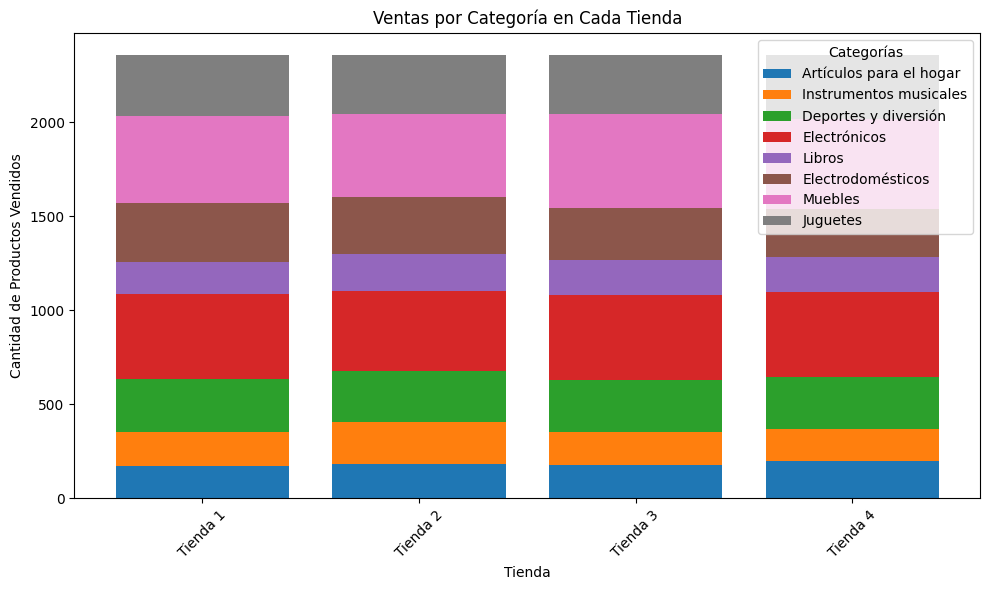

In [ ]:
# Crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(10, 6))

# Preparar datos para el gráfico
tiendas = list(ventas.keys())
categorias = list({categoria for tienda in ventas.values() for categoria in tienda.keys()})

# Crear un diccionario con los datos de las ventas
data = {tienda: [ventas[tienda].get(categoria, 0) for categoria in categorias] for tienda in tiendas}

# Crear barras apiladas
bottoms = [0] * len(tiendas)
for categoria_idx, categoria in enumerate(categorias):
    heights = [data[tienda][categoria_idx] for tienda in tiendas]
    ax.bar(tiendas, heights, bottom=bottoms, label=categoria)
    bottoms = [sum(x) for x in zip(bottoms, heights)]

# Personalizar el gráfico
ax.set_title('Ventas por Categoría en Cada Tienda')
ax.set_xlabel('Tienda')
ax.set_ylabel('Cantidad de Productos Vendidos')
ax.legend(title='Categorías')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [ ]:
# Calcular las calificaciones promedio por tienda
calificaciones_promedio = {}

# Iterar sobre las filas del dataframe
for _, row in datos.iterrows():
    tienda = row['Tienda']
    calificacion = row['Calificación']

    # Acumular calificaciones para cada tienda
    if tienda not in calificaciones_promedio:
        calificaciones_promedio[tienda] = {'total_calificaciones': 0, 'numero_calificaciones': 0}

    calificaciones_promedio[tienda]['total_calificaciones'] += calificacion
    calificaciones_promedio[tienda]['numero_calificaciones'] += 1

# Calcular el promedio para cada tienda
for tienda, valores in calificaciones_promedio.items():
    total_calificaciones = valores['total_calificaciones']
    numero_calificaciones = valores['numero_calificaciones']
    promedio = total_calificaciones / numero_calificaciones if numero_calificaciones > 0 else 0
    calificaciones_promedio[tienda] = promedio

# Mostrar las calificaciones promedio
print("Calificaciones promedio por tienda:")
for tienda, promedio in calificaciones_promedio.items():
    print(f"{tienda}: {promedio:.2f}")

Calificaciones promedio por tienda:
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


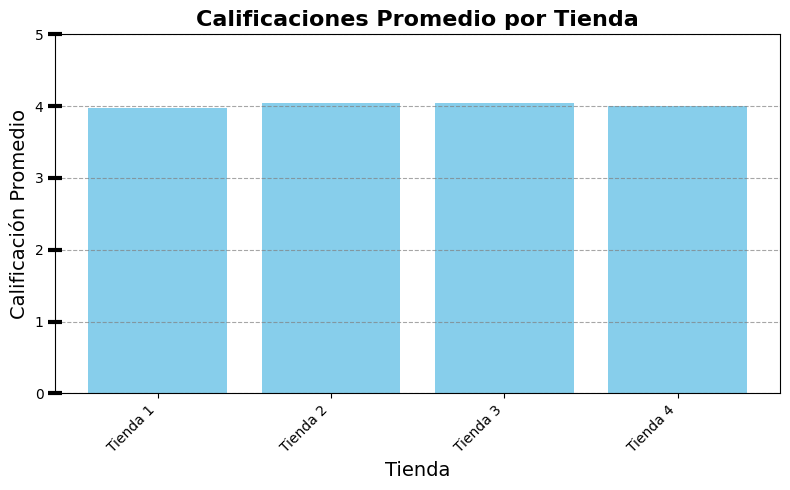

In [ ]:
# Crear un gráfico de barras para mostrar las calificaciones promedio por tienda
tiendas = list(calificaciones_promedio.keys())
calificaciones = list(calificaciones_promedio.values())

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(tiendas, calificaciones, color='skyblue')

# Personalizar el gráfico
ax.set_title('Calificaciones Promedio por Tienda', fontsize=16, fontweight='bold')
ax.set_xlabel('Tienda', fontsize=14)
ax.set_ylabel('Calificación Promedio', fontsize=14)

# Ajustar la escala del eje Y para hacerlo más notorio
ax.set_ylim(0, 5)  # Aseguramos que las calificaciones están entre 0 y 5
ax.yaxis.set_ticks([i for i in range(0, 6)])  # Marcas de 0 a 5 en el eje Y
ax.yaxis.set_tick_params(length=10, width=3, direction='inout', grid_color='gray', grid_alpha=0.5)

# Agregar una cuadrícula para mejorar la visibilidad
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Mejorar la visibilidad del gráfico
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# 4. Productos más y menos vendidos

In [ ]:
# Calcular las ventas por producto y tienda
# Vamos a contar las ventas de cada producto en cada tienda
productos_vendidos = datos.groupby(['Tienda', 'Producto'])['Cantidad de cuotas'].sum().reset_index()

# Visualizar el producto más vendido y el menos vendido para cada tienda
for tienda in productos_vendidos['Tienda'].unique():
    print(f"\nProductos más y menos vendidos en {tienda}:")
    tienda_data = productos_vendidos[productos_vendidos['Tienda'] == tienda]
    tienda_data_sorted = tienda_data.sort_values(by='Cantidad de cuotas', ascending=False)

    # Producto más vendido
    producto_mas_vendido = tienda_data_sorted.head(1)
    print(f"Producto más vendido: {producto_mas_vendido['Producto'].values[0]} con {producto_mas_vendido['Cantidad de cuotas'].values[0]} ventas.")

    # Producto menos vendido
    producto_menos_vendido = tienda_data_sorted.tail(1)
    print(f"Producto menos vendido: {producto_menos_vendido['Producto'].values[0]} con {producto_menos_vendido['Cantidad de cuotas'].values[0]} ventas.")


Productos más y menos vendidos en Tienda 1:
Producto más vendido: Secadora de ropa con 214 ventas.
Producto menos vendido: Celular ABXY con 78 ventas.

Productos más y menos vendidos en Tienda 2:
Producto más vendido: Iniciando en programación con 223 ventas.
Producto menos vendido: Mesa de comedor con 89 ventas.

Productos más y menos vendidos en Tienda 3:
Producto más vendido: Bicicleta con 191 ventas.
Producto menos vendido: TV LED UHD 4K con 94 ventas.

Productos más y menos vendidos en Tienda 4:
Producto más vendido: Dashboards con Power BI con 196 ventas.
Producto menos vendido: Armario con 88 ventas.


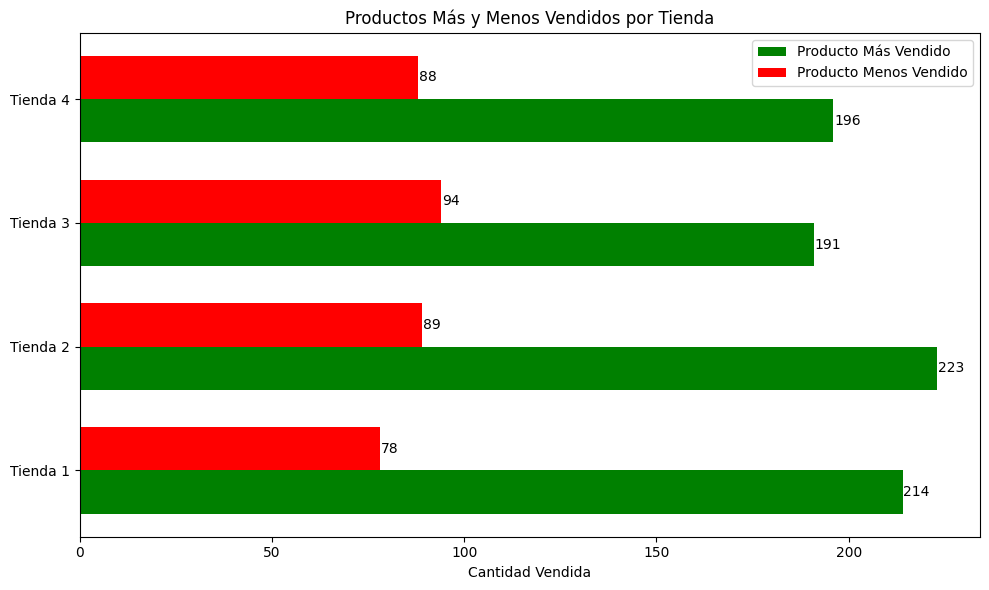

In [ ]:
# Preparar los datos para graficar
productos_mas_vendidos = []
productos_menos_vendidos = []
tiendas = productos_vendidos['Tienda'].unique()

for tienda in tiendas:
    tienda_data = productos_vendidos[productos_vendidos['Tienda'] == tienda]
    tienda_data_sorted = tienda_data.sort_values(by='Cantidad de cuotas', ascending=False)

    # Producto más vendido
    producto_mas_vendido = tienda_data_sorted.head(1)
    productos_mas_vendidos.append((tienda, producto_mas_vendido['Producto'].values[0], producto_mas_vendido['Cantidad de cuotas'].values[0]))

    # Producto menos vendido
    producto_menos_vendido = tienda_data_sorted.tail(1)
    productos_menos_vendidos.append((tienda, producto_menos_vendido['Producto'].values[0], producto_menos_vendido['Cantidad de cuotas'].values[0]))

# Crear un gráfico de barras para visualizar los productos más y menos vendidos por tienda
fig, ax = plt.subplots(figsize=(10, 6))

# Extraer los productos más vendidos
tiendas_mas_vendidos = [item[0] for item in productos_mas_vendidos]
productos_mas = [item[1] for item in productos_mas_vendidos]
ventas_mas = [item[2] for item in productos_mas_vendidos]

# Extraer los productos menos vendidos
tiendas_menos_vendidos = [item[0] for item in productos_menos_vendidos]
productos_menos = [item[1] for item in productos_menos_vendidos]
ventas_menos = [item[2] for item in productos_menos_vendidos]

# Posicionar las barras
bar_width = 0.35
index = range(len(tiendas))

# Graficar los productos más vendidos
ax.barh(index, ventas_mas, bar_width, label='Producto Más Vendido', color='green')

# Graficar los productos menos vendidos
ax.barh([i + bar_width for i in index], ventas_menos, bar_width, label='Producto Menos Vendido', color='red')

# Etiquetas y título
ax.set_yticks([i + bar_width / 2 for i in index])
ax.set_yticklabels(tiendas_mas_vendidos)
ax.set_xlabel('Cantidad Vendida')
ax.set_title('Productos Más y Menos Vendidos por Tienda')

# Añadir etiquetas de los valores de las barras
for i, v in enumerate(ventas_mas):
    ax.text(v + 0.2, i, str(v), va='center', color='black')
for i, v in enumerate(ventas_menos):
    ax.text(v + 0.2, i + bar_width, str(v), va='center', color='black')

# Mostrar leyenda
ax.legend()

# Mejorar disposición del gráfico
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [ ]:
# Calcular el costo de envío promedio por tienda
costo_envio_promedio = datos.groupby('Tienda')['Costo de envío'].mean().reset_index()


# Imprimir el costo de envío promedio por tienda
print("Costo de Envío Promedio por Tienda:")
print(costo_envio_promedio)

Costo de Envío Promedio por Tienda:
     Tienda  Costo de envío
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


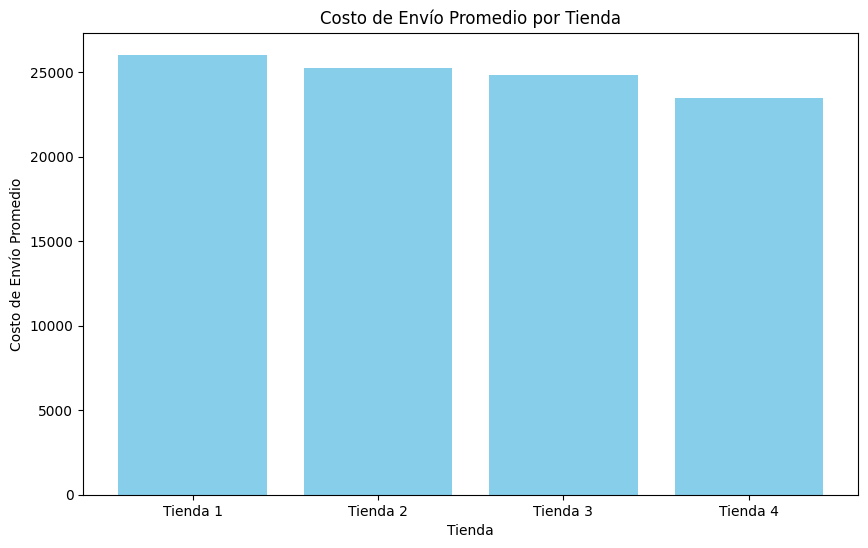

In [ ]:
# Visualizar los resultados con un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(costo_envio_promedio['Tienda'], costo_envio_promedio['Costo de envío'], color='skyblue')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio')
plt.title('Costo de Envío Promedio por Tienda')
plt.show()